In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import pandas as pd
from pandas import Timestamp
from datetime import datetime, timedelta
import pandas as pd

In [2]:
import sys
sys.path

['/home/autumn/Attrition_Online_XML',
 '/var/anaconda3/lib/python38.zip',
 '/var/anaconda3/lib/python3.8',
 '/var/anaconda3/lib/python3.8/lib-dynload',
 '',
 '/home/autumn/.local/lib/python3.8/site-packages',
 '/var/anaconda3/lib/python3.8/site-packages',
 '/var/anaconda3/lib/python3.8/site-packages/IPython/extensions',
 '/home/autumn/.ipython']

In [3]:
data = pd.read_csv("/home/autumn/Attrition_Online_XML/Data/autumn_attrition_all_variables.csv", encoding = 'unicode_escape')

/var/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (91) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
data.head()

,customer_account_sk,subaccount_status,total_revenue_3mos,total_revenue_6mos,total_revenue_9mos,total_revenue_12mos,sum_active_rev_flag,sum_zero_billing_flag,sum_yago_revenue,sum_curr_year_revenue,...,price_change_Q2_Q3,price_change_Q3_Q4,price_change_Q1_Q2_alert,price_change_Q2_Q3_alert,price_change_Q3_Q4_alert,avg_account_issues_12mos,avg_nonpassworkd_12mos,avg_passworkd_12mos,avg_prod_support_12mos,avg_tech_issues_12mos
0,67572,Active,762.91,1585.57,2284.68,2998.29,21,0,2359.28,2998.29,...,-0.00823462,-0.004559,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
1,67580,attrited,4577.31,11251.83,14373.38,17414.65,73,0,11676.02,17414.65,...,0.18001,0.021731,0,0,0,0.008929,0.022321,0.000000,0.004464,0.000000
2,67616,Active,750.00,1500.00,2250.00,3184.45,21,0,2250.00,3184.45,...,-0.691781,1.561404,1,1,1,0.000000,0.250000,0.000000,0.000000,0.000000
3,67625,Active,825.50,1782.65,3356.85,4737.65,21,0,2469.00,4737.65,...,-0.0842348,0.000081,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
4,67688,Active,474.25,920.30,1588.50,2023.10,21,0,1369.45,2023.10,...,-0.0854247,0.016430,0,0,0,0.052632,0.105263,0.157895,0.026316,0.052632


In [5]:
data.dtypes[data.dtypes =='object'] 

subaccount_status     object
price_change_Q2_Q3    object
dtype: object

In [6]:
data2 =  data.drop(['subaccount_status', 'attrition_dt', 'LastSearchDate'],  axis=1)

In [7]:
data2['price_change_Q2_Q3'] = pd.to_numeric(data.price_change_Q2_Q3, errors='coerce')

In [8]:
data2['binary_response'] =  list(map(lambda x: 0\
                                          if (x=='Active') else 1, \
                                          data['subaccount_status']))


In [9]:
data2.dtypes[data2.dtypes !='object'] 

customer_account_sk         int64
total_revenue_3mos        float64
total_revenue_6mos        float64
total_revenue_9mos        float64
total_revenue_12mos       float64
                           ...   
avg_nonpassworkd_12mos    float64
avg_passworkd_12mos       float64
avg_prod_support_12mos    float64
avg_tech_issues_12mos     float64
binary_response             int64
Length: 99, dtype: object

In [10]:
data2.head()

,customer_account_sk,total_revenue_3mos,total_revenue_6mos,total_revenue_9mos,total_revenue_12mos,sum_active_rev_flag,sum_zero_billing_flag,sum_yago_revenue,sum_curr_year_revenue,sum_curr_3mos_revenue,...,price_change_Q3_Q4,price_change_Q1_Q2_alert,price_change_Q2_Q3_alert,price_change_Q3_Q4_alert,avg_account_issues_12mos,avg_nonpassworkd_12mos,avg_passworkd_12mos,avg_prod_support_12mos,avg_tech_issues_12mos,binary_response
0,67572,762.91,1585.57,2284.68,2998.29,21,0,2359.28,2998.29,762.91,...,-0.004559,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,67580,4577.31,11251.83,14373.38,17414.65,73,0,11676.02,17414.65,4577.31,...,0.021731,0,0,0,0.008929,0.022321,0.000000,0.004464,0.000000,1
2,67616,750.00,1500.00,2250.00,3184.45,21,0,2250.00,3184.45,750.00,...,1.561404,1,1,1,0.000000,0.250000,0.000000,0.000000,0.000000,0
3,67625,825.50,1782.65,3356.85,4737.65,21,0,2469.00,4737.65,825.50,...,0.000081,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,67688,474.25,920.30,1588.50,2023.10,21,0,1369.45,2023.10,474.25,...,0.016430,0,0,0,0.052632,0.105263,0.157895,0.026316,0.052632,0


In [11]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [12]:
train=data2
train = train.set_index('customer_account_sk') 

In [13]:
df = train.drop(['binary_response'], 1)  ### drop the response variable

In [14]:
X = df.fillna(0)

In [15]:
Y = train.binary_response

In [16]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.25, random_state=42)

In [17]:
train.head()

,total_revenue_3mos,total_revenue_6mos,total_revenue_9mos,total_revenue_12mos,sum_active_rev_flag,sum_zero_billing_flag,sum_yago_revenue,sum_curr_year_revenue,sum_curr_3mos_revenue,sum_yago_3mos_revenue,...,price_change_Q3_Q4,price_change_Q1_Q2_alert,price_change_Q2_Q3_alert,price_change_Q3_Q4_alert,avg_account_issues_12mos,avg_nonpassworkd_12mos,avg_passworkd_12mos,avg_prod_support_12mos,avg_tech_issues_12mos,binary_response
customer_account_sk,,,,,,,,,,,,,,,,,,,,,
67572,762.91,1585.57,2284.68,2998.29,21,0,2359.28,2998.29,762.91,2968.88,...,-0.004559,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0
67580,4577.31,11251.83,14373.38,17414.65,73,0,11676.02,17414.65,4577.31,15818.64,...,0.021731,0,0,0,0.008929,0.022321,0.000000,0.004464,0.000000,1
67616,750.00,1500.00,2250.00,3184.45,21,0,2250.00,3184.45,750.00,3184.45,...,1.561404,1,1,1,0.000000,0.250000,0.000000,0.000000,0.000000,0
67625,825.50,1782.65,3356.85,4737.65,21,0,2469.00,4737.65,825.50,4716.45,...,0.000081,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0
67688,474.25,920.30,1588.50,2023.10,21,0,1369.45,2023.10,474.25,1982.40,...,0.016430,0,0,0,0.052632,0.105263,0.157895,0.026316,0.052632,0


## 1.Models based on low correlated variables

In [18]:
# Create correlation matrix
corr_matrix = train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] >= 0.4)]
len(to_drop)

69

In [19]:
corr = train.drop(columns = to_drop) ### 
corr.shape

(9590, 29)

In [20]:
corr2 = corr.fillna(0)

In [21]:
low_cor = []
for col in corr2:
    low_cor.append(col)

In [22]:
low_cor_x=X_train[low_cor]

In [23]:
import operator
import statsmodels.api as sm
import pandas as pd
def remove_most_insignificant(df, results):
    # use operator to find the key which belongs to the maximum value in the dictionary:
    max_p_value = max(results.pvalues.iteritems(), key=operator.itemgetter(1))[0]
    # this is the feature you want to drop:
    df.drop(columns = max_p_value, inplace = True)
    return df

In [24]:
X = low_cor_x
y = y_train

In [25]:
insignificant_feature = True
while insignificant_feature:
        results = sm.Logit(y.astype(float),X.astype(float)).fit()
        significant = [p_value < 0.05 for p_value in results.pvalues]
        if all(significant):
            insignificant_feature = False
        else:
            if X.shape[1] == 1:  # if there's only one insignificant variable left
                print('No significant features found')
                results = None
                insignificant_feature = False
            else:            
                X = remove_most_insignificant(X, results)
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.229421
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.229421
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.229421
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.229422
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.229424
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.229428
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.229436
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.229449
         Iterations 10


/var/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Optimization terminated successfully.
         Current function value: 0.229501
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.229584
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.229663
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.229760
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.229904
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.230054
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.230402
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.230570
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:        binary_response   No. Observations:                 7192
Model:            

## 2.1:drop above highly correlated variables to reduce noise 

## 3: Try Random Forest to select features

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
# Create correlation matrix
corr_matrix = train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] >= 0.9)]
len(to_drop)

42

In [28]:
model = RandomForestRegressor(random_state=1, max_depth=10)

In [29]:
train2 = train.drop(columns = to_drop)
train2.shape

(9590, 56)

In [30]:
df = train2.drop(['binary_response'], 1)  ### drop the response variable

In [31]:
df2 = df.fillna(0)

In [32]:
model.fit(df2, train.binary_response)

RandomForestRegressor(max_depth=10, random_state=1)

In [33]:
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-30:]  # top 30 features
indices2 = np.argsort(importances)[-50:]  # top 50 features

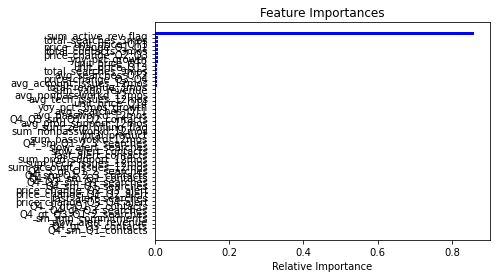

In [34]:
plt.title('Feature Importances')
plt.barh(range(len(indices2)), importances[indices2], color='b', align='center')
plt.yticks(range(len(indices2)), [features[i] for i in indices2])
plt.xlabel('Relative Importance')
plt.show()

In [35]:
rf_top30_var = [features[i] for i in indices]
rf_top50_var = [features[i] for i in indices2]

## 3. Train logit regression on selected random forest selected features

### 3.1 Train top 30 random forest selected features 

In [36]:
x=X_train[rf_top30_var]
x2 = x.fillna(0)

In [37]:
# Create correlation matrix
corr_matrix = x2.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] >= 0.5)]
len(to_drop)

7

In [38]:
x3=x2.drop(columns = to_drop)
x3.shape

(7192, 23)

In [39]:
import operator
import statsmodels.api as sm
import pandas as pd
def remove_most_insignificant(df, results):
    # use operator to find the key which belongs to the maximum value in the dictionary:
    max_p_value = max(results.pvalues.iteritems(), key=operator.itemgetter(1))[0]
    # this is the feature you want to drop:
    df.drop(columns = max_p_value, inplace = True)
    return df

In [40]:
X = x3
y = y_train

In [41]:
insignificant_feature = True
while insignificant_feature:
        results = sm.Logit(y.astype(float),X.astype(float)).fit()
        significant = [p_value < 0.05 for p_value in results.pvalues]
        if all(significant):
            insignificant_feature = False
        else:
            if X.shape[1] == 1:  # if there's only one insignificant variable left
                print('No significant features found')
                results = None
                insignificant_feature = False
            else:            
                X = remove_most_insignificant(X, results)
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.381305
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.381343
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.381344
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.381388
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.381394
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.381403
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.381419
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.381467
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.381500
         Iterations 9
                           Logit Regression Results                           
D

### 3.2 Train top 50 random forest selected features 

In [42]:
x=X_train[rf_top50_var]
x2 = x.fillna(0)

In [43]:
# Create correlation matrix
corr_matrix = x2.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] >= 0.5)]
len(to_drop)

15

In [44]:
x3=x2.drop(columns = to_drop)
x3.shape

(7192, 35)

In [45]:
import operator
import statsmodels.api as sm
import pandas as pd
def remove_most_insignificant(df, results):
    # use operator to find the key which belongs to the maximum value in the dictionary:
    max_p_value = max(results.pvalues.iteritems(), key=operator.itemgetter(1))[0]
    # this is the feature you want to drop:
    df.drop(columns = max_p_value, inplace = True)
    return df

In [46]:
X = x3
y = y_train

In [47]:
insignificant_feature = True
while insignificant_feature:
        results = sm.Logit(y.astype(float),X.astype(float)).fit()
        significant = [p_value < 0.05 for p_value in results.pvalues]
        if all(significant):
            insignificant_feature = False
        else:
            if X.shape[1] == 1:  # if there's only one insignificant variable left
                print('No significant features found')
                results = None
                insignificant_feature = False
            else:            
                X = remove_most_insignificant(X, results)
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.278290
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.278297
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.278297
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.278300
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.278309
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.278320
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.278334
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.278349
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.278373
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

## 4. RFE feature selection

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import datasets


In [49]:
lm = LinearRegression()
rfe = RFE(lm, 9)  
rfe = rfe.fit(df2, train.binary_response)

/var/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_features_to_select=9 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [50]:
df2.shape

(9590, 55)

In [51]:
print(rfe.support_)

[False False  True False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False  True False  True  True  True  True False False
 False False False False False False False False False False False False
 False  True  True False False False False]


In [52]:
print(rfe.ranking_) 

[40  9  1 41 36 47 17 16 23 34 43 46 42 44  8 10 15 11  1 13  7 27 24  3
 18  6 12 28  1 14  1  1  1  1 19 29 31 22 26 20 37 38 45 35 39 32 33  2
  5  1  1  4 30 25 21]


In [53]:
names = []
for col in df2:
    names.append(col)

In [54]:
print("Features sorted by their rank:")
rankings = sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names))
for i in rankings:
    print(i)

Features sorted by their rank:
(1, 'Q4_3_gt_Q1_2_searches')
(1, 'Q4_sm_Q1_2_3_contacts')
(1, 'avg_account_issues_12mos')
(1, 'fast_alert_contacts')
(1, 'price_change_Q3_Q4_alert')
(1, 'slow_alert_contacts')
(1, 'slow_alert_searches')
(1, 'sm_min_commitments')
(1, 'sum_zero_billing_flag')
(2, 'price_change_Q1_Q2_alert')
(3, 'Q4_sm_Q1_contacts')
(4, 'avg_nonpassworkd_12mos')
(5, 'price_change_Q2_Q3_alert')
(6, 'Q4_Q3_sm_Q1_contacts')
(7, 'Q4_gt_Q3_Q1_2_searches')
(8, 'Q4_gt_Q3_searches')
(9, 'sum_active_rev_flag')
(10, 'Q4_gt_Q3_contacts')
(11, 'Q4_gt_Qt1_2_contacts')
(12, 'Q4_Q3_sm_Q1_Q2_contacts')
(13, 'Q4_3_gt_Q1_2_contacts')
(14, 'fast_alert_searches')
(15, 'Q4_gt_Qt1_2_searches')
(16, 'slow_alert_revenue')
(17, 'fast_alert_revenue')
(18, 'Q4_Q3_sm_Q1_searches')
(19, 'sum_account_issues_12mos')
(20, 'total_product')
(21, 'avg_tech_issues_12mos')
(22, 'sum_prod_support_12mos')
(23, 'sum_zero_usage_flag')
(24, 'Q4_sm_Q1_searches')
(25, 'avg_prod_support_12mos')
(26, 'sum_tech_issues_12

In [55]:
rfe_col = ['Q4_3_gt_Q1_2_searches', 'Q4_sm_Q1_2_3_contacts','avg_account_issues_12mos','fast_alert_contacts','price_change_Q3_Q4_alert', 'slow_alert_contacts',  'slow_alert_searches','sm_min_commitments', 'sum_zero_billing_flag']

In [56]:
x=X_train[rfe_col]
x2 = x.fillna(0)

In [57]:
X = x2
y = y_train

In [58]:
insignificant_feature = True
while insignificant_feature:
        results = sm.Logit(y.astype(float),X.astype(float)).fit()
        significant = [p_value < 0.05 for p_value in results.pvalues]
        if all(significant):
            insignificant_feature = False
        else:
            if X.shape[1] == 1:  # if there's only one insignificant variable left
                print('No significant features found')
                results = None
                insignificant_feature = False
            else:            
                X = remove_most_insignificant(X, results)
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.365462
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.365465
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.365478
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.365492
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        binary_response   No. Observations:                 7192
Model:                          Logit   Df Residuals:                     7186
Method:                           MLE   Df Model:                            5
Date:                Fri, 18 Dec 2020   Pseudo R-squ.:                -0.07115
Time:                        14:24:13   Log-Likelihood:                -2628.6
converged:                       True   LL-Null:                       -2454.0
Covariance Type:            nonrobust  

## 6. Forward Selection - F regression

In [59]:
from sklearn.feature_selection import f_regression

In [60]:
raw_scores, p_values = f_regression(df2,train.binary_response )

In [61]:
print("Features sorted by their p_values of the F-scores:")
p_values2 = sorted(zip(map(lambda x: round(x, 4), p_values), names))
for i in p_values2:
    print(i)

Features sorted by their p_values of the F-scores:
(0.0, 'Q4_3_gt_Q1_2_contacts')
(0.0, 'Q4_3_gt_Q1_2_searches')
(0.0, 'Q4_Q3_sm_Q1_Q2_contacts')
(0.0, 'Q4_Q3_sm_Q1_contacts')
(0.0, 'Q4_Q3_sm_Q1_searches')
(0.0, 'Q4_gt_Q3_Q1_2_contacts')
(0.0, 'Q4_gt_Q3_Q1_2_searches')
(0.0, 'Q4_gt_Q3_contacts')
(0.0, 'Q4_gt_Q3_searches')
(0.0, 'Q4_gt_Qt1_2_contacts')
(0.0, 'Q4_gt_Qt1_2_searches')
(0.0, 'Q4_sm_Q1_2_3_contacts')
(0.0, 'Q4_sm_Q1_2_3_searches')
(0.0, 'Q4_sm_Q1_contacts')
(0.0, 'Q4_sm_Q1_searches')
(0.0, 'avg_account_issues_12mos')
(0.0, 'avg_nonpassworkd_12mos')
(0.0, 'avg_passworkd_12mos')
(0.0, 'avg_tech_issues_12mos')
(0.0, 'fast_alert_contacts')
(0.0, 'fast_alert_searches')
(0.0, 'price_change_Q1_Q2_alert')
(0.0, 'price_change_Q2_Q3_alert')
(0.0, 'price_change_Q3_Q4')
(0.0, 'price_change_Q3_Q4_alert')
(0.0, 'slow_alert_contacts')
(0.0, 'slow_alert_revenue')
(0.0, 'slow_alert_searches')
(0.0, 'sm_min_commitments')
(0.0, 'sum_account_issues_12mos')
(0.0, 'sum_active_rev_flag')
(0.0, 'su

In [62]:
f_selection = ['Q4_3_gt_Q1_2_contacts',
 'Q4_3_gt_Q1_2_searches',
 'Q4_Q3_sm_Q1_Q2_contacts',
 'Q4_Q3_sm_Q1_contacts',
 'Q4_Q3_sm_Q1_searches',
 'Q4_gt_Q3_Q1_2_contacts',
 'Q4_gt_Q3_Q1_2_searches',
 'Q4_gt_Q3_contacts',
 'Q4_gt_Q3_searches',
 'Q4_gt_Qt1_2_contacts',
 'Q4_gt_Qt1_2_searches',
 'Q4_sm_Q1_2_3_contacts',
 'Q4_sm_Q1_2_3_searches',
 'Q4_sm_Q1_contacts',
 'Q4_sm_Q1_searches',
 'avg_account_issues_12mos',
 'avg_nonpassworkd_12mos',
 'avg_passworkd_12mos',
 'avg_tech_issues_12mos',
 'fast_alert_contacts',
 'fast_alert_searches',
# 'fast_alert_revenue', 
 'price_change_Q1_Q2_alert',
 'price_change_Q2_Q3_alert',
 'price_change_Q3_Q4',
 #'price_change3_Q4_alert',
 'slow_alert_contacts',
 'slow_alert_revenue',
 'slow_alert_searches',
 'sm_min_commitments',
 'sum_account_issues_12mos',
 #'sum_active_rev_flag',
 'sum_passworkd_12mos',
 'sum_prod_support_12mos',
 'sum_zero_billing_flag',
 'sum_zero_usage_flag',
 'total_contacts_3mos',
 'total_product',
 'total_revenue_3mos',
 'unit_price_QT1',
 'unit_price_QT2',
 'unit_price_QT3',
 'unit_price_QT4',
 'price_change_Q2_Q3',
 'avg_prod_support_12mos',
 'sum_nonpassworkd_12mos',
 'sum_yago_revenue',
 'total_searches_9mos',
 'avg_searches_QT1',
 'total_searches_3mos']

In [63]:
x=X_train[f_selection]
x2 = x.fillna(0)

In [64]:
# Create correlation matrix
corr_matrix = x2.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] >= 0.5)]
len(to_drop)

21

In [65]:
x3=x2.drop(columns = to_drop)
x3.shape

(7192, 26)

In [66]:
X = x3
y = y_train

In [67]:
insignificant_feature = True
while insignificant_feature:
        results = sm.Logit(y.astype(float),X.astype(float)).fit()
        significant = [p_value < 0.05 for p_value in results.pvalues]
        if all(significant):
            insignificant_feature = False
        else:
            if X.shape[1] == 1:  # if there's only one insignificant variable left
                print('No significant features found')
                results = None
                insignificant_feature = False
            else:            
                X = remove_most_insignificant(X, results)
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.304335
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.304335
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.304400
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.304498
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.304602
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.304758
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.304935
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.305073
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.305248
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

## Feature Combinations

In [68]:
comb_col = ['Q4_3_gt_Q1_2_contacts', 
'Q4_3_gt_Q1_2_searches', 
'fast_alert_contacts', 
'slow_alert_searches', 
'sm_min_commitments', 
'sum_account_issues_12mos', 
'sum_passworkd_12mos', 
'sum_prod_support_12mos', 
#'sum_zero_usage_flag', 
'total_product', 
#'total_revenue_3mos', 
#'total_searches_9mos', 
'slow_alert_contacts', 
#'fast_alert_revenue', 
#'fast_alert_searches',            
'sum_tech_issues_12mos', 
#'sum_zero_billing_flag', 
#'sum_active_rev_flag', 
'Q4_sm_Q1_2_3_contacts', 
'total_searches_3mos', 
'Q4_gt_Q3_searches']
#'Q4_gt_Qt1_2_searches', 
#'price_change_Q1_Q2_alert']

In [69]:
x=X_train[comb_col]
x2 = x.fillna(0)

In [70]:
x2.shape

(7192, 14)

In [71]:
X = x2
y = y_train

In [72]:
logit_rf=sm.Logit(y_train.astype(float),x2.astype(float)).fit()
result_rf=logit_rf.summary()
result_rf

Optimization terminated successfully.
         Current function value: 0.306727
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        binary_response   No. Observations:                 7192
Model:                          Logit   Df Residuals:                     7178
Method:                           MLE   Df Model:                           13
Date:                Fri, 18 Dec 2020   Pseudo R-squ.:                  0.1011
Time:                        14:24:14   Log-Likelihood:                -2206.0
converged:                       True   LL-Null:                       -2454.0
Covariance Type:            nonrobust   LLR p-value:                 9.985e-98
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Q4_3_gt_Q1_2_contacts       -1.3910      0.107    -12.940      0.000      -1.602      -1.180
Q4_3_gt_Q1_2_searches       -1.4598      0.083    -17.561      0.000      -1.623      -1.297
fast_alert_contacts          0.3085      0.120      2.564      0.010       0.073       0.544
slow_alert_searches          0.7017      0.124      5.640      0.000       0.458       0.946
sm_min_commitments          -0.3414      0.073     -4.695      0.000      -0.484      -0.199
sum_account_issues_12mos     0.3669      0.042      8.736      0.000       0.285       0.449
sum_passworkd_12mos         -0.0685      0.012     -5.716      0.000      -0.092      -0.045
sum_prod_support_12mos      -0.1926      0.041     -4.709      0.000      -0.273      -0.112
total_product               -0.1055      0.031     -3.370      0.001      -0.167      -0.044
slow_alert_contacts          0.4034      0.134      3.009      0.003       0.141       0.666
sum_tech_issues_12mos        0.1661      0.059      2.801      0.005       0.050       0.282
Q4_sm_Q1_2_3_contacts        0.4527      0.100      4.513      0.000       0.256       0.649
total_searches_3mos      -8.026e-05   1.35e-05     -5.936      0.000      -0.000   -5.38e-05
Q4_gt_Q3_searches           -0.6400      0.085     -7.569      0.000      -0.806      -0.474
============================================================================================
"""

In [73]:
test_final_col =X_test[comb_col]

In [74]:
y_pred_final = logit_rf.predict(test_final_col)

In [75]:
test_final_col.shape

(2398, 14)

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_final.round(), normalize=True)

0.8882402001668057

In [77]:
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds =metrics.roc_curve(y_test, y_pred_final)
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.742124


In [78]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
281,0.323432,0.67509,0.676568,-0.001477,0.12035


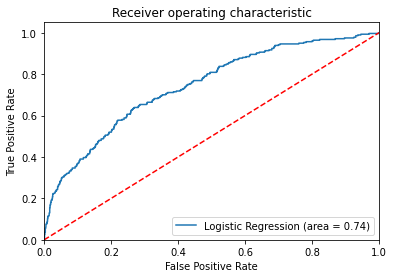

In [79]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr, tpr, thresholds =metrics.roc_curve(y_test, y_pred_final)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' %  roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

ROC Score: https://pulmonarychronicles.com/index.php/pulmonarychronicles/article/view/391/848

In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_final.round())
print(confusion_matrix)

[[2077   44]
 [ 224   53]]


In [81]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

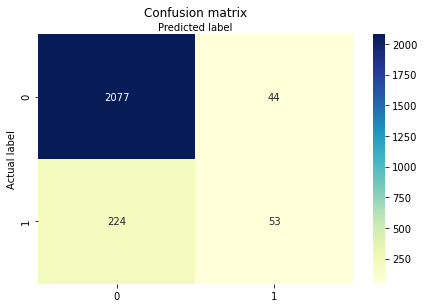

In [82]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [83]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_final.round()))
print("Precision:",metrics.precision_score(y_test, y_pred_final.round()))
print("Recall:",metrics.recall_score(y_test, y_pred_final.round()))

Accuracy: 0.8882402001668057
Precision: 0.5463917525773195
Recall: 0.19133574007220217


https://toolguyd.com/the-difference-between-accuracy-and-precision/

how to fix? https://www.kdnuggets.com/2016/12/4-reasons-machine-learning-model-wrong.html

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_final.round()))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2121
           1       0.55      0.19      0.28       277

    accuracy                           0.89      2398
   macro avg       0.72      0.59      0.61      2398
weighted avg       0.86      0.89      0.86      2398



In [85]:
final_df = x2

In [86]:
final_df['y'] = y_train

In [87]:
final_df['y'].value_counts()

0    6419
1     773
Name: y, dtype: int64

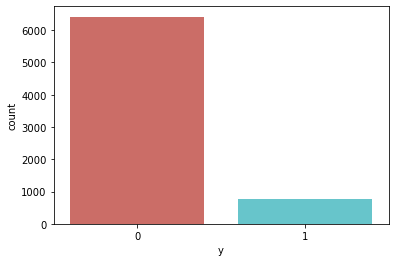

<Figure size 432x288 with 0 Axes>

In [88]:
sns.countplot(x = 'y', data = final_df, palette = 'hls')
plt.show()
plt.savefig('count_plot')

In [89]:
final_df.groupby('y').mean()

,Q4_3_gt_Q1_2_contacts,Q4_3_gt_Q1_2_searches,fast_alert_contacts,slow_alert_searches,sm_min_commitments,sum_account_issues_12mos,sum_passworkd_12mos,sum_prod_support_12mos,total_product,slow_alert_contacts,sum_tech_issues_12mos,Q4_sm_Q1_2_3_contacts,total_searches_3mos,Q4_gt_Q3_searches
y,,,,,,,,,,,,,,
0,0.473438,0.667238,0.081010,0.036766,0.422496,0.428883,4.628603,0.810874,1.912447,0.051721,0.276367,-0.181025,6137.529678,0.431531
1,0.168176,0.310479,0.196636,0.244502,0.765847,0.783959,2.565330,0.476067,2.212160,0.204398,0.327296,-0.439845,1219.856404,0.301423


In [90]:
cor_matrix = final_df.corr()

In [91]:
cor_matrix

,Q4_3_gt_Q1_2_contacts,Q4_3_gt_Q1_2_searches,fast_alert_contacts,slow_alert_searches,sm_min_commitments,sum_account_issues_12mos,sum_passworkd_12mos,sum_prod_support_12mos,total_product,slow_alert_contacts,sum_tech_issues_12mos,Q4_sm_Q1_2_3_contacts,total_searches_3mos,Q4_gt_Q3_searches,y
Q4_3_gt_Q1_2_contacts,1.000000,0.314235,-0.067459,-0.160662,-0.165134,0.059959,0.105740,0.106848,0.078964,-0.211085,0.046985,0.456000,-0.008753,0.073143,-0.190441
Q4_3_gt_Q1_2_searches,0.314235,1.000000,-0.113344,-0.315253,-0.206679,0.006720,0.064679,0.059290,0.037564,-0.168091,0.005738,0.285772,0.022812,0.188762,-0.228724
fast_alert_contacts,-0.067459,-0.113344,1.000000,0.103914,0.039576,0.025173,0.023670,0.006577,0.025613,0.152090,0.014164,-0.258164,-0.008414,-0.139103,0.123048
slow_alert_searches,-0.160662,-0.315253,0.103914,1.000000,0.121584,0.030112,-0.010958,-0.029013,0.004227,0.304332,0.018470,-0.222302,-0.007699,-0.097399,0.272862
sm_min_commitments,-0.165134,-0.206679,0.039576,0.121584,1.000000,-0.055083,-0.155033,-0.179980,-0.022517,0.044175,-0.129912,-0.089219,-0.086614,-0.121965,0.213393
sum_account_issues_12mos,0.059959,0.006720,0.025173,0.030112,-0.055083,1.000000,0.216094,0.327796,0.102359,0.006099,0.375719,-0.016447,0.037088,-0.005183,0.109038
sum_passworkd_12mos,0.105740,0.064679,0.023670,-0.010958,-0.155033,0.216094,1.000000,0.409749,0.180410,-0.020821,0.361611,-0.024848,0.023460,0.015309,-0.047713
sum_prod_support_12mos,0.106848,0.059290,0.006577,-0.029013,-0.179980,0.327796,0.409749,1.000000,0.188886,-0.046800,0.434094,0.026251,0.036781,0.028721,-0.056486
total_product,0.078964,0.037564,0.025613,0.004227,-0.022517,0.102359,0.180410,0.188886,1.000000,0.064880,0.192685,-0.108745,-0.019055,0.024671,0.069911
slow_alert_contacts,-0.211085,-0.168091,0.152090,0.304332,0.044175,0.006099,-0.020821,-0.046800,0.064880,1.000000,0.012525,-0.393239,-0.017085,-0.067807,0.187671


In [92]:
Y_test = y_test

In [93]:
X_test = test_final_col

In [94]:
Y_test.shape

(2398,)

In [95]:
X_test.shape

(2398, 14)

In [96]:
#First getting my output predicted dataset of the test
X_test_predicted = logit_rf.predict(X_test.astype(float)) #sm.add_constant to have model with intercept


In [97]:
predicted_output_dataset = pd.merge(X_test_predicted.rename('predicted_score'), Y_test, left_index=True, right_index=True, how='outer')

In [98]:
predicted_output_dataset.head()

,predicted_score,binary_response
customer_account_sk,,
262141,0.122235,0
1475482,0.016381,0
68706,0.033203,0
170316,0.454506,0
136457,0.560296,0


In [99]:
predicted_output_dataset['nonattritor'] = 1 - predicted_output_dataset.binary_response

In [100]:
predicted_output_dataset['bucket'] = pd.qcut(predicted_output_dataset.predicted_score, 20)

In [101]:
predicted_output_dataset_min = predicted_output_dataset.groupby(['bucket']).predicted_score.min().reset_index(name="Minimum_Predicted_Score")
predicted_output_dataset_max = predicted_output_dataset.groupby(['bucket']).predicted_score.max().reset_index(name="Maximum_Predicted_Score")
predicted_output_dataset_attr = predicted_output_dataset.groupby(['bucket']).binary_response.sum().reset_index(name="Num_Attritors")
predicted_output_dataset_attr['Total_Attritors'] = predicted_output_dataset_attr.Num_Attritors.sum()
predicted_output_dataset_nonattr = predicted_output_dataset.groupby(['bucket']).nonattritor.sum().reset_index(name="Num_Non_Attritors")
predicted_output_dataset_nonattr['Total_Non_Attritors'] = predicted_output_dataset_nonattr.Num_Non_Attritors.sum()

In [102]:
agg1 = pd.merge(predicted_output_dataset_attr, predicted_output_dataset_nonattr, on='bucket', how = 'outer')
agg2 = pd.merge(agg1, predicted_output_dataset_min, on='bucket', how = 'outer')
agg3 = pd.merge(agg2, predicted_output_dataset_max, on='bucket', how = 'outer')
agg3 = agg3.assign(Total_cust = agg1.Total_Attritors + agg1.Total_Non_Attritors) 
agg3['Attrition_Rate'] = agg3.Num_Attritors / agg3.Total_Attritors
agg3['NonAttrition_Rate'] = agg3.Num_Non_Attritors / agg3.Total_Non_Attritors
agg4 = agg3.sort_values(by='Minimum_Predicted_Score', ascending=False)
agg4['Cummul_Attrition_Rate']=(agg4.Attrition_Rate.cumsum()) * 100
agg4['Cummul_NonAttrition_Rate']=(agg4.NonAttrition_Rate.cumsum()) * 100

In [103]:
agg4['KS'] = np.round(agg4['Cummul_Attrition_Rate']-agg4['Cummul_NonAttrition_Rate'], 3)
Max_KS = agg4.KS.max()

In [104]:
print('Maximum KS = ', Max_KS)

Maximum KS =  35.849


In [105]:
agg4.to_csv('KS_table_imbalanced_class.csv')

In [106]:
agg4

,bucket,Num_Attritors,Total_Attritors,Num_Non_Attritors,Total_Non_Attritors,Minimum_Predicted_Score,Maximum_Predicted_Score,Total_cust,Attrition_Rate,NonAttrition_Rate,Cummul_Attrition_Rate,Cummul_NonAttrition_Rate,KS
19,"(0.47, 0.867]",62,277,58,2121,4.732373e-01,0.867401,2398,0.223827,0.027346,22.382671,2.734559,19.648
18,"(0.389, 0.47]",27,277,93,2121,3.889577e-01,0.469089,2398,0.097473,0.043847,32.129964,7.119283,25.011
17,"(0.331, 0.389]",21,277,99,2121,3.316188e-01,0.388950,2398,0.075812,0.046676,39.711191,11.786893,27.924
16,"(0.256, 0.331]",23,277,97,2121,2.564607e-01,0.331398,2398,0.083032,0.045733,48.014440,16.360207,31.654
15,"(0.183, 0.256]",21,277,99,2121,1.828129e-01,0.254579,2398,0.075812,0.046676,55.595668,21.027817,34.568
14,"(0.143, 0.183]",17,277,103,2121,1.427059e-01,0.182681,2398,0.061372,0.048562,61.732852,25.884017,35.849
13,"(0.124, 0.143]",13,277,106,2121,1.251244e-01,0.142263,2398,0.046931,0.049976,66.425993,30.881660,35.544
12,"(0.102, 0.124]",10,277,110,2121,1.025552e-01,0.124391,2398,0.036101,0.051862,70.036101,36.067893,33.968
11,"(0.0846, 0.102]",7,277,113,2121,8.466463e-02,0.102313,2398,0.025271,0.053277,72.563177,41.395568,31.168
10,"(0.0717, 0.0846]",12,277,107,2121,7.176564e-02,0.084579,2398,0.043321,0.050448,76.895307,46.440358,30.455


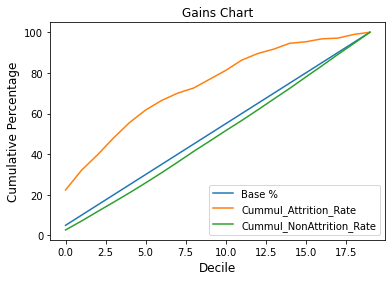

In [107]:
agg4['Base %'] = [5, 10, 15, 20, 25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
gains = agg4.filter(['Base %','Cummul_Attrition_Rate','Cummul_NonAttrition_Rate'])
gains_chart = gains.plot(kind='line',use_index=False)
gains_chart.set_ylabel("Cumulative Percentage",fontsize=12)
gains_chart.set_xlabel("Decile",fontsize=12)
gains_chart.set_title("Gains Chart")
gains_chart.legend(loc='lower right')

In [108]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


x=X_train[rf_final_col]
x2 = x.fillna(0)

In [109]:
# monitor training performance
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
from operator import itemgetter

In [114]:
comb_col = ['Q4_3_gt_Q1_2_contacts', 
'Q4_3_gt_Q1_2_searches', 
'fast_alert_contacts', 
'slow_alert_searches', 
'sm_min_commitments', 
'sum_account_issues_12mos', 
'sum_passworkd_12mos', 
'sum_prod_support_12mos', 
#'sum_zero_usage_flag', 
'total_product', 
#'total_revenue_3mos', 
#'total_searches_9mos', 
'slow_alert_contacts', 
#'fast_alert_revenue', 
#'fast_alert_searches',            
'sum_tech_issues_12mos', 
#'sum_zero_billing_flag', 
#'sum_active_rev_flag', 
'Q4_sm_Q1_2_3_contacts', 
'total_searches_3mos', 
'Q4_gt_Q3_searches']
#'Q4_gt_Qt1_2_searches', 
#'price_change_Q1_Q2_alert']

In [115]:
x=X_train[comb_col]
x_train = x.fillna(0)

In [116]:

y_train = y_train

In [117]:
x=X_test[comb_col]
x_test = x.fillna(0)

In [118]:
y_train.value_counts()

0    6419
1     773
Name: binary_response, dtype: int64

In [119]:
y_test.value_counts()

0    2121
1     277
Name: binary_response, dtype: int64

In [120]:
def build_xgboost(X_train, y_train, X_test, y_test, n_iter):
    """
    random search hyperparameter tuning for xgboost
    classification task, n_iter controls the number
    of hyperparameter combinations that it will search for
    """
    # xgboost base parameter:
    xgb_param_fixed = {        
        # setting it to a positive value 
        # might help when class is extremely imbalanced
        # as it makes the update more conservative
        'max_delta_step': 1,
            
        # use all possible cores for training
        'n_jobs': -1,
        
        # set number of estimator to a large number
        # and the learning rate to be a small number,
        # we'll let early stopping decide when to stop
        'n_estimators': 300,
        'learning_rate': 0.1}
    xgb_base = XGBClassifier(**xgb_param_fixed)

    # random search's parameter:
    # scikit-learn's random search works with distributions; 
    # but it must provide a rvs method for sampling values from it,
    # such as those from scipy.stats.distributions
    # randint: discrete random variables ranging from low to high
    # uniform: uniform continuous random variable between loc and loc + scale
    xgb_param_options = {
        'max_depth': randint(low = 3, high = 15),
        'colsample_bytree': uniform(loc = 0.7, scale = 0.3),
        'subsample': uniform(loc = 0.7, scale = 0.3)}
    
    eval_set = [(X_train, y_train), (X_test, y_test)]
    xgb_fit_params = {   
        'eval_metric': 'auc', 
        'eval_set': eval_set,
        'early_stopping_rounds': 5,
        'verbose': False}

    model_xgb = RandomizedSearchCV(
        estimator = xgb_base,
        param_distributions = xgb_param_options,
        cv = 10,   
        
        # number of parameter settings that are sampled
        n_iter = n_iter,
        
        # n_jobs can be a parameter (since it's a fast task
        # for this toy dataset, we'll simply we using 1 jobs)
        n_jobs = 1,
        verbose = 1
    ).fit(X_train, y_train, **xgb_fit_params)
    
    print('Best score obtained: {0}'.format(model_xgb.best_score_))
    print('Best Parameters:')
    for param, value in model_xgb.best_params_.items():
        print('\t{}: {}'.format(param, value))
    
    return model_xgb.best_estimator_

In [121]:
import warnings

# temporary fix for the issue raised in the following link,
# will likely be removed in the next version
# https://github.com/scikit-learn/scikit-learn/issues/10449
warnings.filterwarnings(
    action = 'ignore', module = 'sklearn')

xgb_model = build_xgboost(x_train, y_train, x_test, y_test, n_iter = 15)
ntree_limit = xgb_model.best_ntree_limit
y_pred_prob = xgb_model.predict_proba(x_test, ntree_limit = ntree_limit)[:, 1]
print('auc:', roc_auc_score(y_test, y_pred_prob))

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best score obtained: 0.9086470406428682
Best Parameters:
	colsample_bytree: 0.9934230257754799
	max_depth: 4
	subsample: 0.828622821215685
auc: 0.8339818252067601


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   40.2s finished


In [122]:
eval_set = [(x_train, y_train), (x_test, y_test)]

In [123]:
xgb_params_fixed = {
    'learning_rate': 0.1,
    
    # use 'multi:softprob' for multi-class problems
    'objective': 'binary:logistic',
    
    # length of the longest path from a root to a leaf
    'max_depth': 13,
    
    # subsample ratio of columns when constructing each tree
    'colsample_bytree': 0.8327960583709925,
    
    # setting it to a positive value 
    # might help when class is extremely imbalanced
    # as it makes the update more conservative
    'max_delta_step': 1, 
    'n_estimators': 150,
    
    # use all possible cores for training
    'n_jobs': -1
}

In [124]:
xgb_tree = XGBClassifier(**xgb_params_fixed)

In [125]:
#xgb_tree = xgb_tree.fit(x_train, y_train,eval_metric=["error", "logloss", "auc"], eval_set=eval_set, verbose=True)
#xgb_tree.fit(x_train, y_train,eval_metric=["error", "logloss", "auc"], eval_set=eval_set, verbose = False)
xgb_tree.fit(x_train, y_train,eval_metric=["error", "logloss", "auc"], eval_set=eval_set,early_stopping_rounds = 10, verbose = 10)

[0]	validation_0-error:0.09858	validation_0-logloss:0.65433	validation_0-auc:0.57257	validation_1-error:0.11385	validation_1-logloss:0.65572	validation_1-auc:0.55328
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[10]	validation_0-error:0.08315	validation_0-logloss:0.37457	validation_0-auc:0.85143	validation_1-error:0.10092	validation_1-logloss:0.39709	validation_1-auc:0.78336
[20]	validation_0-error:0.07216	validation_0-logloss:0.24316	validation_0-auc:0.92657	validation_1-error:0.10050	validation_1-logloss:0.30329	validation_1-auc:0.81258
[30]	validation_0-error:0.06021	validation_0-logloss:0.18222	validation_0-auc:0.95628	validation_1-error:0.10008	validation_1-logloss:0.27951	validation_1-auc:0.81521
Stopping. Best iteration:
[25]	validation_0-error:0.06688	validation_0-logloss:0.20908	validation_0-auc:0.94122	validation_1-error:0.10175	validation_1-logloss:0.28711	validati

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8327960583709925, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=1, max_depth=13,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [126]:
def plot_xgboost_importance(xgb_tree, feature_names, threshold = 5):
    """
    Improvements on xgboost's plot_importance function, where 
    1. the importance are scaled relative to the max importance, and 
    number that are below 5% of the max importance will be chopped off
    2. we need to supply the actual feature name so the label won't 
    just show up as feature 1, feature 2, which are not very interpretable
    
    returns the important features's index sorted in descending order
    """
    # convert from dictionary to tuples and sort by the
    # importance score in ascending order for plotting purpose
    importance = xgb_tree.get_booster().get_score(importance_type = 'gain')
    #tuples = [(int(k[1:]), importance[k]) for k in importance]
    #tuples = sorted(tuples, key = itemgetter(1))
    labels, values = list(importance.keys()), list(importance.values())

    # make importances relative to max importance,
    # and filter out those that have smaller than 5%
    # relative importance (threshold chosen arbitrarily)
    labels, values = np.asarray(labels), np.asarray(values)
    values = np.round(100 * values / np.max(values), 2)
    mask = values > threshold
    labels, values = labels[mask], values[mask]
    feature_labels =labels
    
    ylocs = np.arange(values.shape[0])
    plt.barh(ylocs, values, align = 'center')
    for x, y in zip(values, ylocs):
        plt.text(x + 1, y, x, va = 'center')

    plt.ylabel('Features')
    plt.xlabel('Relative Importance Score')
    plt.title('Feature Importance Score')
    plt.xlim([0, 110])
    plt.yticks(ylocs, feature_labels)
    
    # revert the ordering of the importance
    return labels[::-1]


array(['Q4_3_gt_Q1_2_contacts', 'sum_prod_support_12mos',
       'slow_alert_searches', 'total_searches_3mos',
       'fast_alert_contacts', 'sum_tech_issues_12mos',
       'sum_passworkd_12mos', 'total_product', 'Q4_sm_Q1_2_3_contacts',
       'Q4_gt_Q3_searches', 'Q4_3_gt_Q1_2_searches',
       'sum_account_issues_12mos', 'sm_min_commitments',
       'slow_alert_contacts'], dtype='<U24')

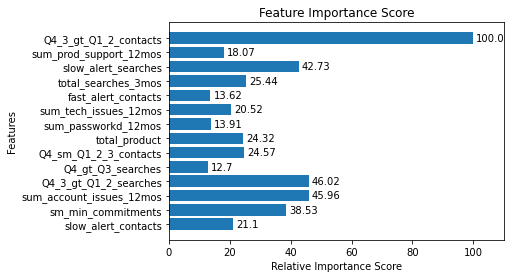

In [127]:
feature_names = np.arange(x_train.shape[1])
plot_xgboost_importance(xgb_tree = xgb_tree, feature_names = feature_names)

def misclassified(y_pred, y_true):
    """
    custom evaluation metric for xgboost, the metric
    counts the number of misclassified examples assuming 
    that classes with p>0.5 are positive
    """
    labels = y_true.get_label() # obtain true labels
    preds = y_pred > 0.5 # obtain predicted values
    return 'misclassified', np.sum(labels != preds)


xgb_tree.fit(x_train, y_train, 
              eval_metric = misclassified, eval_set = eval_set,
              early_stopping_rounds = 5, verbose = 10)

ntree_limit = xgb_tree.best_ntree_limit
y_pred_prob = xgb_tree.predict_proba(x_test, ntree_limit = ntree_limit)[:, 1]
print('auc:', roc_auc_score(y_test, y_pred_prob))

In [128]:
# make predictions for test data
y_pred = xgb_tree.predict_proba(x_test, ntree_limit = ntree_limit)[:, 1]

In [129]:
predictions = [round(value) for value in y_pred]

In [130]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.87%


def rsquared(y_pred, y_true):
    """rsquared evaluation metric for xgboost's regression"""
    labels = y_true.get_label()
    sse = np.sum((labels - y_pred) ** 2)
    sst = np.sum((labels - np.mean(labels)) ** 2)
    rsquared = 1 - sse / sst

    # note that the documentation says the 
    # objective function is minimized, thus
    # we take the negative sign of rsquared
    return 'r2', -rsquared

xgb_tree.fit(x_train, y_train, 
              eval_metric = rsquared, eval_set = eval_set,
              early_stopping_rounds = 5, verbose = 10)

ntree_limit = xgb_tree.best_ntree_limit
y_pred_prob = xgb_tree.predict_proba(x_test, ntree_limit = ntree_limit)[:, 1]
print('auc:', roc_auc_score(y_test, y_pred_prob))

results = xgb_tree.evals_result()
print(results)

In [131]:
from matplotlib import pyplot

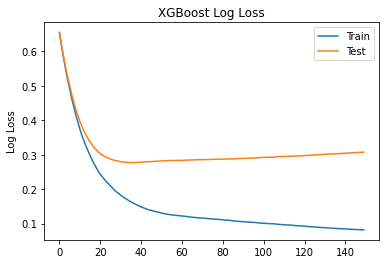

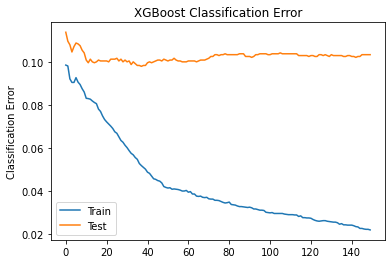

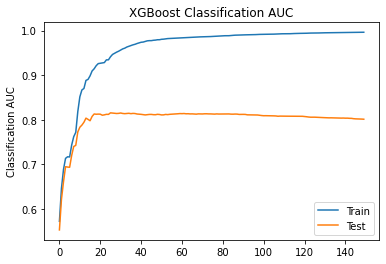

In [132]:
# retrieve performance metrics
#xgb_tree.fit(x_train, y_train,eval_metric=["error", "logloss", "auc"], eval_set=eval_set,early_stopping_rounds = 10, verbose = 10)
#xgb_tree = xgb_tree.fit(x_train, y_train,eval_metric=["error", "logloss", "auc"], eval_set=eval_set, verbose=True)
xgb_tree.fit(x_train, y_train,eval_metric=["error", "logloss", "auc"], eval_set=eval_set, verbose = False)
results = xgb_tree.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

# plot AUC
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Test')
ax.legend()
pyplot.ylabel('Classification AUC')
pyplot.title('XGBoost Classification AUC')
pyplot.show()

In [133]:
### chec the model performance

In [134]:
#First getting my output predicted dataset of the test
X_test_predicted = xgb_tree.predict_proba(x_test, ntree_limit = ntree_limit)[:, 1]

In [135]:
X_test_predicted = pd.DataFrame(X_test_predicted)

In [136]:
X_test_predicted

,0
0,0.088781
1,0.078051
2,0.080998
3,0.094138
4,0.122728
...,...
2393,0.179737
2394,0.084607
2395,0.238519
2396,0.093296


In [137]:
y_test2 = y_test.reset_index()

In [138]:
y_test2

,customer_account_sk,binary_response
0,262141,0
1,1475482,0
2,68706,0
3,170316,0
4,136457,0
...,...,...
2393,164945,0
2394,961029,0
2395,75703,0
2396,924992,1


In [139]:
x_test.shape

(2398, 14)

In [140]:
y_test2.shape

(2398, 2)

In [141]:
frames = [X_test_predicted, y_test2]

In [142]:
xgboost_output = pd.concat(frames,axis=1, sort=False)

In [143]:
xgboost_output

,0,customer_account_sk,binary_response
0,0.088781,262141,0
1,0.078051,1475482,0
2,0.080998,68706,0
3,0.094138,170316,0
4,0.122728,136457,0
...,...,...,...
2393,0.179737,164945,0
2394,0.084607,961029,0
2395,0.238519,75703,0
2396,0.093296,924992,1


In [144]:
xgboost_output.columns = ['predicted_score','customer_account_sk', 'binary_response']

In [145]:
xgboost_output.head()

,predicted_score,customer_account_sk,binary_response
0,0.088781,262141,0
1,0.078051,1475482,0
2,0.080998,68706,0
3,0.094138,170316,0
4,0.122728,136457,0


In [146]:
xgboost_output['nonattritor'] = 1 - xgboost_output.binary_response

In [147]:
xgboost_output['bucket'] = pd.qcut(xgboost_output.predicted_score, 20)

In [148]:
xgboost_output_min = xgboost_output.groupby(['bucket']).predicted_score.min().reset_index(name="Minimum_Predicted_Score")
xgboost_output_max = xgboost_output.groupby(['bucket']).predicted_score.max().reset_index(name="Maximum_Predicted_Score")
xgboost_output_attr = xgboost_output.groupby(['bucket']).binary_response.sum().reset_index(name="Num_Attritors")
xgboost_output_attr['Total_Attritors'] = xgboost_output_attr.Num_Attritors.sum()
xgboost_output_nonattr = xgboost_output.groupby(['bucket']).nonattritor.sum().reset_index(name="Num_Non_Attritors")
xgboost_output_nonattr['Total_Non_Attritors'] = xgboost_output_nonattr.Num_Non_Attritors.sum()

In [149]:
agg5 = pd.merge(xgboost_output_attr, xgboost_output_nonattr, on='bucket', how = 'outer')
agg6 = pd.merge(agg5, xgboost_output_min, on='bucket', how = 'outer')
agg7 = pd.merge(agg6, xgboost_output_max, on='bucket', how = 'outer')
agg7 = agg7.assign(Total_cust = agg5.Total_Attritors + agg5.Total_Non_Attritors) 
agg7['Attrition_Rate'] = agg7.Num_Attritors / agg7.Total_Attritors
agg7['NonAttrition_Rate'] = agg7.Num_Non_Attritors / agg7.Total_Non_Attritors
agg8 = agg7.sort_values(by='Minimum_Predicted_Score', ascending=False)
agg8['Cummul_Attrition_Rate']=(agg8.Attrition_Rate.cumsum()) * 100
agg8['Cummul_NonAttrition_Rate']=(agg8.NonAttrition_Rate.cumsum()) * 100

In [150]:
agg8['KS'] = np.round(agg8['Cummul_Attrition_Rate']-agg8['Cummul_NonAttrition_Rate'], 3)
Max_KS = agg8.KS.max()

In [151]:
Max_KS

46.898

In [152]:
agg8

,bucket,Num_Attritors,Total_Attritors,Num_Non_Attritors,Total_Non_Attritors,Minimum_Predicted_Score,Maximum_Predicted_Score,Total_cust,Attrition_Rate,NonAttrition_Rate,Cummul_Attrition_Rate,Cummul_NonAttrition_Rate,KS
19,"(0.414, 0.91]",80,277,40,2121,0.416642,0.910405,2398,0.288809,0.018859,28.880866,1.885903,26.995
18,"(0.288, 0.414]",44,277,76,2121,0.288858,0.413798,2398,0.158845,0.035832,44.765343,5.469118,39.296
17,"(0.214, 0.288]",23,277,97,2121,0.214701,0.287565,2398,0.083032,0.045733,53.068592,10.042433,43.026
16,"(0.172, 0.214]",23,277,94,2121,0.171793,0.214306,2398,0.083032,0.044319,61.371841,14.474305,46.898
15,"(0.147, 0.172]",12,277,111,2121,0.147014,0.171772,2398,0.043321,0.052334,65.703971,19.707685,45.996
14,"(0.133, 0.147]",14,277,106,2121,0.133309,0.147009,2398,0.050542,0.049976,70.758123,24.705328,46.053
13,"(0.12, 0.133]",8,277,111,2121,0.120273,0.132761,2398,0.028881,0.052334,73.646209,29.938708,43.708
12,"(0.109, 0.12]",10,277,110,2121,0.109392,0.120256,2398,0.036101,0.051862,77.256318,35.124941,42.131
11,"(0.102, 0.109]",11,277,109,2121,0.101696,0.109363,2398,0.039711,0.051391,81.227437,40.264026,40.963
10,"(0.0958, 0.102]",9,277,111,2121,0.095777,0.101678,2398,0.032491,0.052334,84.476534,45.497407,38.979


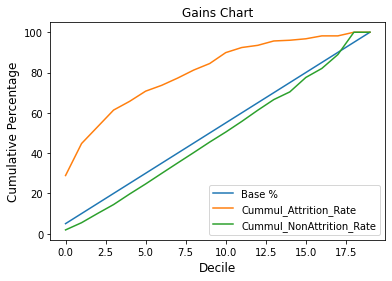

In [154]:
agg8['Base %'] = [5, 10, 15, 20, 25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
gains = agg8.filter(['Base %','Cummul_Attrition_Rate','Cummul_NonAttrition_Rate'])
gains_chart = gains.plot(kind='line',use_index=False)
gains_chart.set_ylabel("Cumulative Percentage",fontsize=12)
gains_chart.set_xlabel("Decile",fontsize=12)
gains_chart.set_title("Gains Chart")
gains_chart.legend(loc='lower right')